In [1]:
# Import dependencies
%matplotlib notebook
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Load in csv data for restaurants and happiness
restpath = os.path.join('Output', 'restaurantdata.csv')
restaurant_df = pd.read_csv(restpath)

happypath = os.path.join('Resources','happiestcities.csv')
happiness_df = pd.read_csv(happypath)

In [3]:
# Rename column and set it as index
happiness_df = happiness_df.rename(columns={'City, State':'Location'}).set_index('Location')
happiness_df.head()

,Overall Rank (1 = Best),Total Score,Emotional and Physical Well-Being Rank,Income and Employment Rank,Community and Environment Rank
Location,,,,,
"Plano, TX",1,72.30,7,6,8
"Irvine, CA",2,71.86,14,11,5
"Madison, WI",3,71.81,3,14,7
"Fremont, CA",4,71.17,10,37,1
"Huntington Beach, CA",5,69.74,6,46,28


In [4]:
# Create blank column for later use
restaurant_df['Converted Price'] = ''

# Reorganize the data into a more logical order
restaurant_df = restaurant_df[['Location', 'Latitude', 'Longitude', 'Name', 'Price', 'Converted Price',
       'Rating', 'Review Count', 'Category 0', 'Category 1', 'Category 2', 'Category 3', 'Out of Business']]
restaurant_df

,Location,Latitude,Longitude,Name,Price,Converted Price,Rating,Review Count,Category 0,Category 1,Category 2,Category 3,Out of Business
0,"Plano, TX",33.040595,-96.750704,Lily's Cafe,$,,4.5,140,American (Traditional),Latin American,NaN,NaN,False
1,"Plano, TX",33.040464,-96.733883,The Latin Pig,$$,,4.0,667,Cuban,NaN,NaN,NaN,False
2,"Plano, TX",33.040504,-96.733625,First Watch,$$,,4.0,248,Breakfast & Brunch,Cafes,American (Traditional),NaN,False
3,"Plano, TX",33.070370,-96.772560,The Gyro Shop,$,,4.5,288,Halal,Mediterranean,NaN,NaN,False
4,"Plano, TX",33.055620,-96.773070,Saucy's Thai & Pho,$$,,4.5,208,Thai,NaN,NaN,NaN,False
5,"Plano, TX",33.086610,-96.771080,Rusty Taco,$,,4.0,464,Tex-Mex,Tacos,NaN,NaN,False
6,"Plano, TX",33.073809,-96.771177,Ferrari's Pizzeria,$,,4.5,194,Pizza,Italian,NaN,NaN,False
7,"Plano, TX",33.055600,-96.772586,Densetsu,$$,,4.0,1214,Japanese,Sushi Bars,NaN,NaN,False
8,"Plano, TX",33.042800,-96.770970,Bull Daddy Noodle Bistro,$,,4.0,217,Taiwanese,Chinese,Noodles,NaN,False
9,"Plano, TX",33.051180,-96.770830,Sip & Savor,$$,,4.0,111,American (New),Wine Bars,NaN,NaN,False


In [5]:
# Loop through dataframes 'Price' column converting values and storing them in a different column
for row in range(len(restaurant_df['Price'])):
    if restaurant_df.loc[row]['Price'] == '$':
        restaurant_df.iloc[row, restaurant_df.columns.get_loc('Converted Price')] = 1
        
    elif restaurant_df.loc[row]['Price'] == '$$':
        restaurant_df.iloc[row, restaurant_df.columns.get_loc('Converted Price')] = 2
        
    elif restaurant_df.loc[row]['Price'] == '$$$':
        restaurant_df.iloc[row, restaurant_df.columns.get_loc('Converted Price')] = 3
        
    elif restaurant_df.loc[row]['Price'] == '$$$$':
        restaurant_df.iloc[row, restaurant_df.columns.get_loc('Converted Price')] = 4
    
    else:
        restaurant_df.iloc[row, restaurant_df.columns.get_loc('Converted Price')] = np.nan

# Drop the rows without a valid value in the Converted Price column        
restaurant_df = restaurant_df.dropna(subset=['Converted Price']).reset_index(drop=True)

# Ensure that the Converted Price column is of the correct dtype
restaurant_df['Converted Price'] = restaurant_df['Converted Price'].astype('int64')

# Show sample of updated dataframe
restaurant_df.head()

,Location,Latitude,Longitude,Name,Price,Converted Price,Rating,Review Count,Category 0,Category 1,Category 2,Category 3,Out of Business
0,"Plano, TX",33.040595,-96.750704,Lily's Cafe,$,1,4.5,140,American (Traditional),Latin American,NaN,NaN,False
1,"Plano, TX",33.040464,-96.733883,The Latin Pig,$$,2,4.0,667,Cuban,NaN,NaN,NaN,False
2,"Plano, TX",33.040504,-96.733625,First Watch,$$,2,4.0,248,Breakfast & Brunch,Cafes,American (Traditional),NaN,False
3,"Plano, TX",33.070370,-96.772560,The Gyro Shop,$,1,4.5,288,Halal,Mediterranean,NaN,NaN,False
4,"Plano, TX",33.055620,-96.773070,Saucy's Thai & Pho,$$,2,4.5,208,Thai,NaN,NaN,NaN,False


In [6]:
# Make a dataframe from Happiness score and the number of restaurants used grouped by cities
graph_df = pd.DataFrame(dict(s1 = happiness_df['Total Score'], s2 = restaurant_df.groupby('Location')['Name'].count()))

# Rename columns
graph_df = graph_df.rename(columns={'s1':'Happiness Score','s2':'Number of Restaurants Used'})

# Add column of average ratings grouped by cities
graph_df['Average Rating'] = restaurant_df.groupby('Location')['Rating'].mean()

# Add column of average price grouped by cities
graph_df['Average Price'] = restaurant_df.groupby('Location')['Converted Price'].mean()

# Add column of sum of review counts grouped by cities
graph_df['Total Review Count'] = restaurant_df.groupby('Location')['Review Count'].sum()

# Show sample of dataframe
graph_df.head()

,Happiness Score,Number of Restaurants Used,Average Rating,Average Price,Total Review Count
"Akron, OH",44.05,44,3.931818,1.590909,3330
"Albuquerque, NM",51.15,42,4.142857,1.738095,7458
"Amarillo, TX",56.21,38,3.618421,1.342105,1361
"Anaheim, CA",65.02,50,4.210000,1.900000,46670
"Anchorage, AK",59.53,44,4.034091,1.886364,6346


In [82]:
# Define a function that will create, populate, and format graphs
def plot_func(ax, colname):
    # Perform calculations for trendline
    colslope, colint, colr, colp, colstd_err = stats.linregress(graph_df['Happiness Score'], graph_df[colname])
    colfit = colslope * graph_df['Happiness Score'] + colint
    
    
    # Make the graph
    xmin, xmax = 25, 75
    ymin, ymax = (graph_df[colname].min() - (0.025*graph_df[colname].max())), (graph_df[colname].max() + (0.025*graph_df[colname].max()))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    ax.scatter(graph_df['Happiness Score'],
               graph_df[colname],
               facecolors='red',
               edgecolors='black',
               linewidth='0.1',
               alpha=1.0,
               s=15,
               marker='o')
    ax.plot(graph_df['Happiness Score'], colfit, 'b--', linewidth=0.5)
    ax.hlines(np.mean(graph_df[colname]), xmin, xmax, colors='black', linewidth=0.5)
    
    ax.legend(['Trend Line','Cities','Sample Mean'], loc='upper left', fontsize='small', fancybox=True)
    
    ax.annotate(s='Mean',
            xy =(72.5,np.mean(graph_df[colname])),
            color='silver')
    ax.annotate(s=f'''
    Trendline formula
    {round(colslope, 5)}x + {round(colint, 5)}
    R-squared value = {round(colr ** 2, 5)}
    ''',
            xy =(25,graph_df[colname].max() - 0.78*(graph_df[colname].max()-graph_df[colname].min())),
            color='silver')
    
    ax.grid(color='silver',
            alpha=0.5)
    
    ax.set_xticks(ticks=np.arange(xmin,xmax + 1,10))
    ax.set_ylabel(colname)
    ax.set_title(f'{colname} vs Happiness Score by City')
    
    

<IPython.core.display.Javascript object>


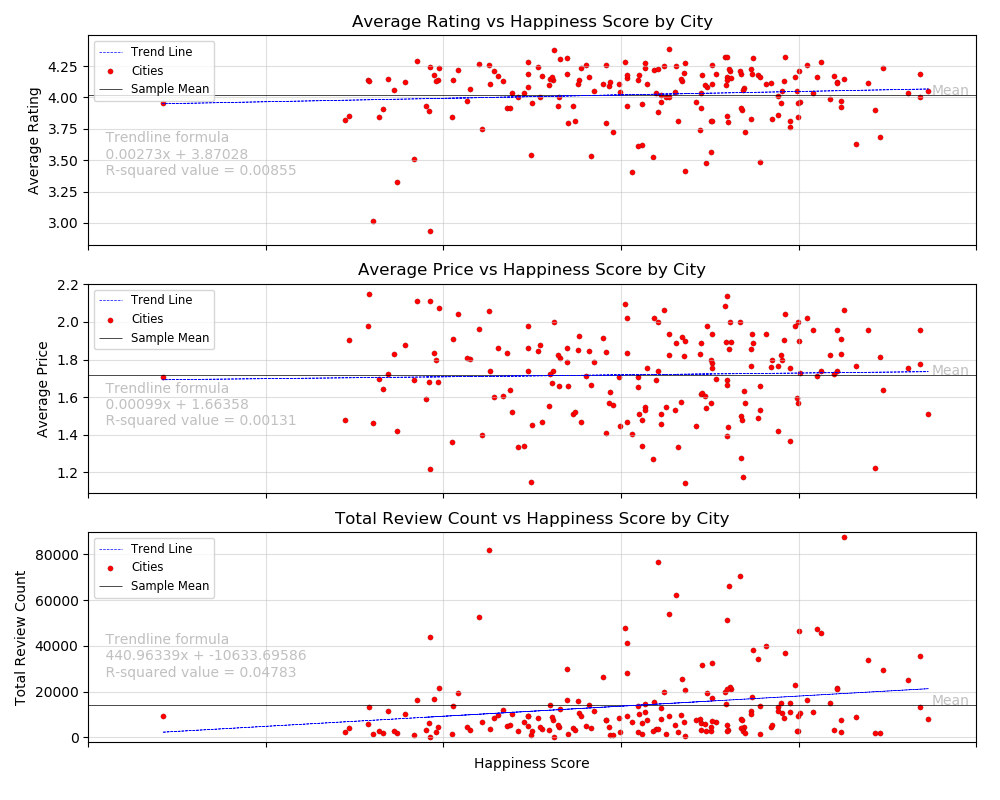

In [83]:
# Create a figure with subplot array
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,8), sharex=True)

# Initialize a counter to skip certain columns
c = 2

# Loop through subplots populating them with data and formatting them
for ax in axs:
    plot_func(ax, graph_df.columns[c])
    c += 1

# Set universal x axis name, since all subplots share it
axs[-1].set_xlabel('Happiness Score')

# Final formatting and show figure
plt.tight_layout()
plt.show()

In [84]:
# Save figure as .png
save_fig = os.path.join('Output',f'HappyGraphs.png')
plt.savefig(save_fig)

In [114]:
# Create txt file to save statistics in
save_stats = os.path.join('Output',f'HappyStats.txt')
file = open(save_stats, 'w+')

# Show measures of center and spread for data sets
for j in range(2,len(graph_df.columns)):
    # Store name of data group
    title = graph_df.columns[j]
    
    # Calculate mean, median, and standard deviation
    mean = np.mean(graph_df[graph_df.columns[j]])
    median = np.median(graph_df[graph_df.columns[j]])
    stdev = np.std(graph_df[graph_df.columns[j]])
    
    toshow = f'''
        {title} Stats
        ---------------------------------------
        Mean: {mean}
        Median: {median}
        St. Dev.: {stdev}
        ---------------------------------------
    '''
    
    # Store everything in txt document and print to screen
    file.write(toshow)    
    print(toshow)

# Close text file
file.close()


        Average Rating Stats
        ---------------------------------------
        Mean: 4.023412426241225
        Median: 4.095744680851064
        St. Dev.: 0.23698446075334068
        ---------------------------------------
    

        Average Price Stats
        ---------------------------------------
        Mean: 1.7193587155636054
        Median: 1.7386128364389233
        St. Dev.: 0.22060474685522333
        ---------------------------------------
    

        Total Review Count Stats
        ---------------------------------------
        Mean: 14108.565934065935
        Median: 8465.5
        St. Dev.: 16190.4629329095
        ---------------------------------------
    


<IPython.core.display.Javascript object>


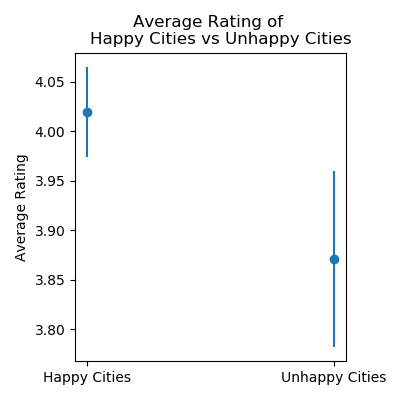


        Results of Average Rating Student's T-test
        ----------------------------------------------------------------------------------------------------
        Since the pval (0.15356760254412852) was greater than 0.05, we accept the null hypothesis 
        that there is no difference in restaurant Average Rating between happy and unhappy cities.
        ----------------------------------------------------------------------------------------------------
    


<IPython.core.display.Javascript object>


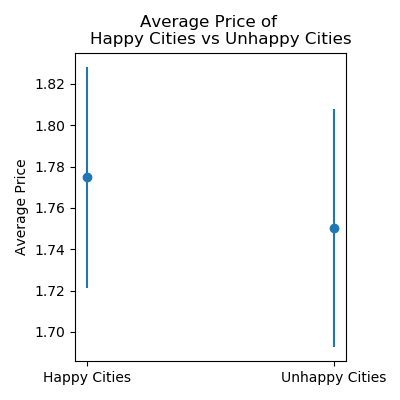


        Results of Average Price Student's T-test
        ----------------------------------------------------------------------------------------------------
        Since the pval (0.7573442195099428) was greater than 0.05, we accept the null hypothesis 
        that there is no difference in restaurant Average Price between happy and unhappy cities.
        ----------------------------------------------------------------------------------------------------
    


<IPython.core.display.Javascript object>


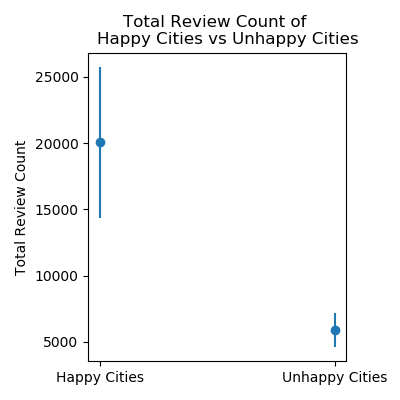


        Results of Total Review Count Student's T-test
        ----------------------------------------------------------------------------------------------------
        Since the pval (0.027967495045165047) was less than than 0.05, we reject the null hypothesis. Our data shows 
        that there is a significant difference in restaurant Total Review Count between happy and unhappy cities.
        ----------------------------------------------------------------------------------------------------
    


In [143]:
# Reopen txt file to append statistics
appendit = open(save_stats, 'a')

# Create a list of columns to loop through for statistical analysis
statistics = ['Average Rating','Average Price','Total Review Count']

# Sort data to easily locate cities based on happiness
stats_df = graph_df.sort_values('Happiness Score', ascending=False)

# Loop through the statistics list and run tests
for statistic in statistics:
    # Gather 15 of the happiest and least happy cities and the column of data needed for the loop
    happygroup = stats_df.loc[:'Sioux Falls, SD', statistic]
    unhappygroup = stats_df.loc['Akron, OH':, statistic]
    
    # Calculate data for plotting
    means = [happygroup.mean(), unhappygroup.mean()]
    sems = [stats.sem(happygroup), stats.sem(unhappygroup)]
    
    # Create figure for plotting
    fig, ax = plt.subplots(figsize=(4,4))
       
    # Plot data to show comparison visually
    ax.errorbar(['Happy Cities','Unhappy Cities'], means, yerr=sems, fmt="o")
    ax.set_ylabel(statistic)
    ax.set_title(f'''{statistic} of 
    Happy Cities vs Unhappy Cities''')
    plt.tight_layout()
    plt.show()
    
    # Save figure as .png
    save_fig = os.path.join('Output',f'{statistic}HappyVsUnHappy.png')
    plt.savefig(save_fig)
    
    # Run a Student's T-test and store the p-value for later reference
    s, pval = stats.ttest_ind(happygroup, unhappygroup, equal_var=False)
    
    # Store the statement for accepting the null hypothesis
    acceptnull = f'''
        Results of {statistic} Student's T-test
        ----------------------------------------------------------------------------------------------------
        Since the pval ({pval}) was greater than 0.05, we accept the null hypothesis 
        that there is no difference in restaurant {statistic} between happy and unhappy cities.
        ----------------------------------------------------------------------------------------------------
    '''

    # Store the statement for rejecting the null hypothesis
    rejectnull = f'''
        Results of {statistic} Student's T-test
        ----------------------------------------------------------------------------------------------------
        Since the pval ({pval}) was less than than 0.05, we reject the null hypothesis. Our data shows 
        that there is a significant difference in restaurant {statistic} between happy and unhappy cities.
        ----------------------------------------------------------------------------------------------------
    '''
    
    # Conditionally print the results of tests to screen and store in a text file
    if pval > 0.05:
        print(acceptnull)
        appendit.write(acceptnull)
    else:
        print(rejectnull)
        appendit.write(rejectnull)

# Close file
appendit.close()